In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
X_train = np.linspace(-1, 1, 20)
y_train = X_train**3 + 0.05 * np.random.randn(20)

In [10]:
X_test = np.linspace(-1, 1, 8)
y_test = X_test**3 + 0.05 * np.random.randn(8)

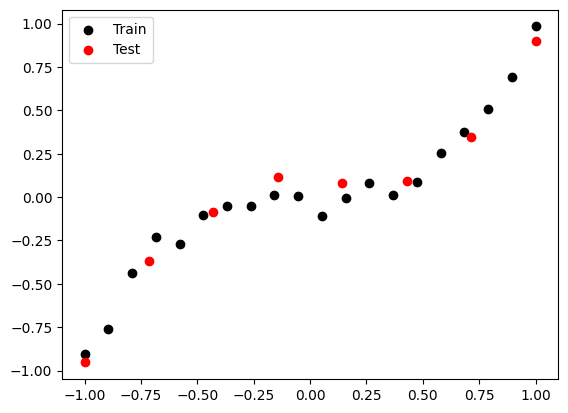

In [12]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c= 'red', label="Test")
plt.legend()
plt.show()

In [13]:
model= Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mse'])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test),verbose=False)

In [16]:
_, train_mse = model.evaluate(X_train,y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

Train MSE: 0.0000
Test MSE: 0.0069


In [17]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


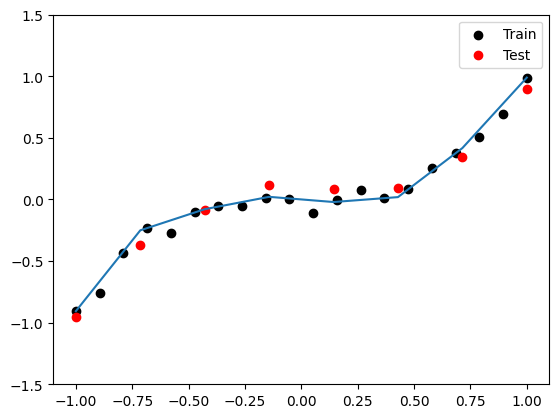

In [18]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c= 'red', label="Test")
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

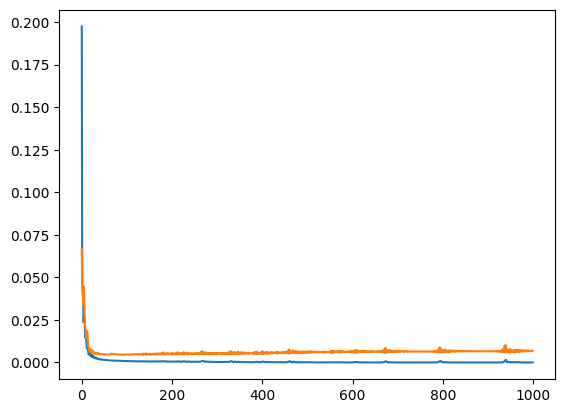

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [29]:
from tensorflow.keras.layers import Dropout
model= Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mse'])

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test),verbose=False)

In [34]:
_, train_mse = model.evaluate(X_train,y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

Train MSE: 0.0123
Test MSE: 0.0167


In [35]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


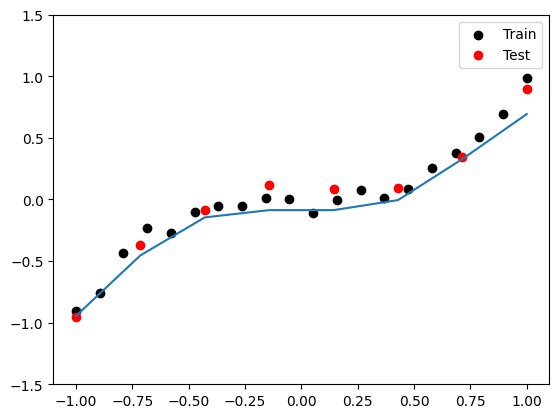

In [36]:
plt.figure()
plt.scatter(X_train, y_train, c='black',label='Train')
plt.scatter(X_test, y_test, c= 'red', label="Test")
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

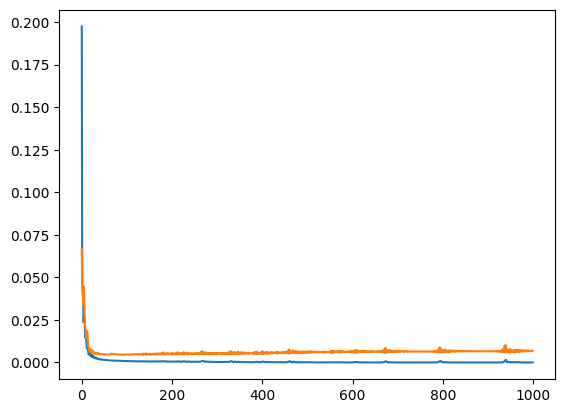

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])